In [52]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 

%matplotlib inline

# Set default matplot figure size
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

NameError: name 'pylab' is not defined

In [57]:
#fix the previous shown error adding a r at the beginning
credit_df = pd.read_csv(r"C:\Users\i_seg\OneDrive\BIG DATA\DATA ANALISYS\MODULE5\Task2\default of credit card clients.csv", header =1)

In [39]:
# Check the first 5 rows of the data frame
credit_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [40]:
# Column names
credit_df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [6]:
# Information about the data set
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

In [58]:
credit_df['EDUCATION'].values[credit_df['EDUCATION'].astype(int) >= 4] = 4
credit_df['EDUCATION'].values[credit_df['EDUCATION'].astype(int) == 0] = 4

In [59]:
#replace values  with more representatives
credit_df["SEX"]=credit_df["SEX"].replace({1: "Male", 2: "Female"})

credit_df["EDUCATION"]=credit_df["EDUCATION"].replace({1: "school", 2: "university", 3:"high school", 4:"Other"})

credit_df["MARRIAGE"]=credit_df["MARRIAGE"].replace({1: "married", 2: "single", 3:"divorce", 4:"Other"})


In [60]:
# Number of clients in each class
credit_df.groupby('SEX')['SEX'].count()

SEX
Female    18112
Male      11888
Name: SEX, dtype: int64

In [61]:
credit_df.groupby('EDUCATION')['EDUCATION'].count()

EDUCATION
Other            468
high school     4917
school         10585
university     14030
Name: EDUCATION, dtype: int64

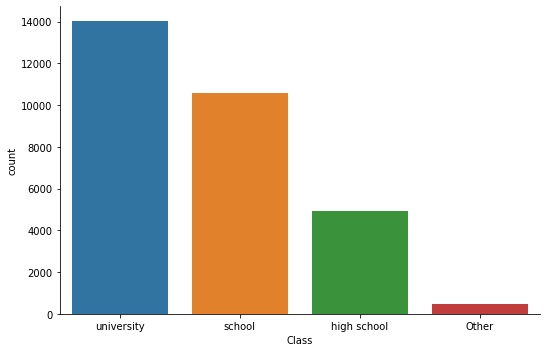

In [62]:
# Instead of a group by, use seaborn to plot the count of clients and education degree
fg = sns.factorplot('EDUCATION', data=credit_df, kind='count', aspect=1.5)
fg.set_xlabels('Class')

In [137]:
# Number of men and women in each of the education levels
credit_df.groupby(['SEX', 'EDUCATION'])['SEX'].count()

SEX     EDUCATION  
Female  Other           298
        high school    2927
        school         6231
        university     8656
Male    Other           170
        high school    1990
        school         4354
        university     5374
Name: SEX, dtype: int64

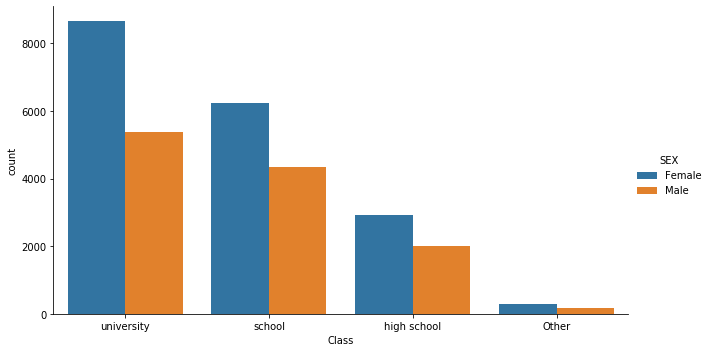

In [63]:
# Again use saeborn to group by Sex and Education
g = sns.factorplot('EDUCATION', data=credit_df, hue='SEX', kind='count', aspect=1.75)
g.set_xlabels('Class')

C:\Users\i_seg\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


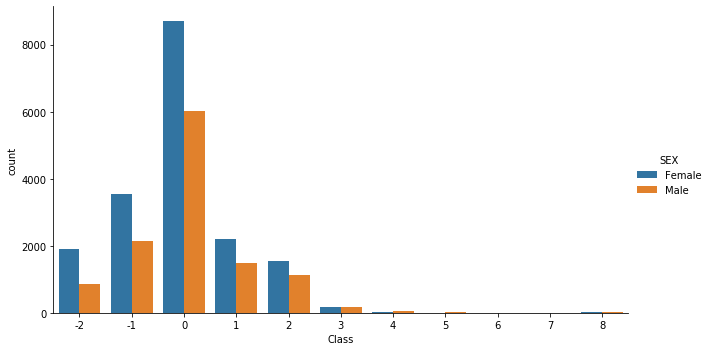

In [163]:
# last Payment behaviour by SEX
g = sns.factorplot('PAY_0', data=credit_df, hue='SEX', kind='count', aspect=1.75)
g.set_xlabels('Class')

In [64]:
# Number of clients married in each Education grouped by sex. Also LIMIT_BAL was found for each class grouped by sex.
credit_df.pivot_table('LIMIT_BAL', 'SEX', 'EDUCATION', aggfunc=np.sum, margins=True)


EDUCATION,Other,high school,school,university,All
SEX,,,,,
Female,55820000,381570000,1299520000,1343696000,3080606000
Male,29036000,240677680,954620000,719590000,1943923680
All,84856000,622247680,2254140000,2063286000,5024529680


In [69]:
#Education degree University
university = credit_df[credit_df['EDUCATION']=="university"]

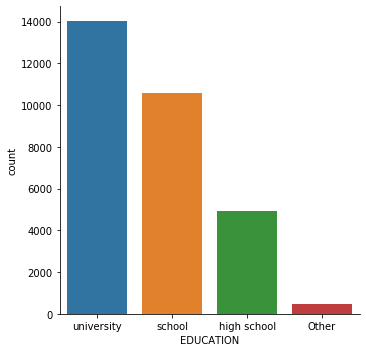

In [66]:
# Factor plot by education level
sns.factorplot('EDUCATION', data=credit_df, kind='count')

In [70]:
# Total number of clients who are prepared students
len(university)

14030

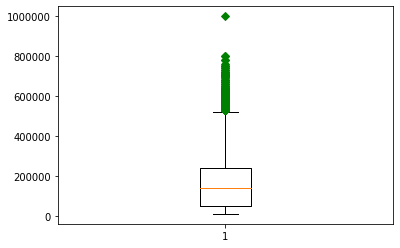

In [145]:
# total  credit limit
A = credit_df['LIMIT_BAL']
plt.boxplot(A,0,'gD')
plt.show()

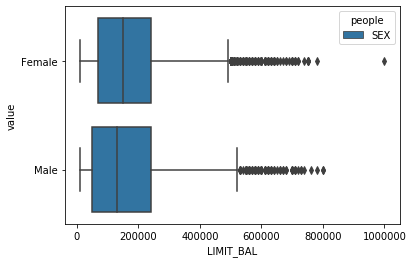

In [149]:
#credit Limit  by sex
dd=pd.melt(credit_df,id_vars=['LIMIT_BAL'],value_vars=['SEX'],var_name='people')
sns.boxplot(x='LIMIT_BAL',y='value',data=dd,hue='people')

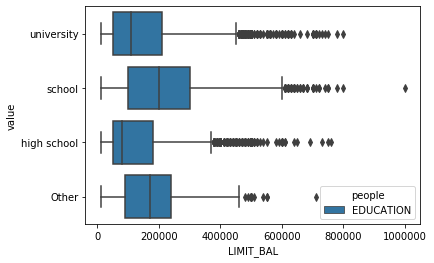

In [150]:
#credit limit by education
dd=pd.melt(credit_df,id_vars=['LIMIT_BAL'],value_vars=['EDUCATION'],var_name='people')
sns.boxplot(x='LIMIT_BAL',y='value',data=dd,hue='people')

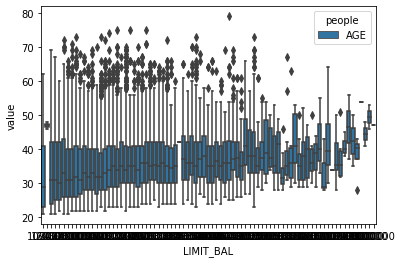

In [151]:
#credit limit by Age
dd=pd.melt(credit_df,id_vars=['LIMIT_BAL'],value_vars=['AGE'],var_name='people')
sns.boxplot(x='LIMIT_BAL',y='value',data=dd,hue='people')

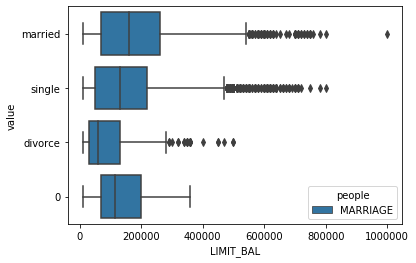

In [152]:
#credit limit by Marriage
dd=pd.melt(credit_df,id_vars=['LIMIT_BAL'],value_vars=['MARRIAGE'],var_name='people')
sns.boxplot(x='LIMIT_BAL',y='value',data=dd,hue='people')

In [72]:
# Number of clients who have education grouped by sex and marriage.
university.pivot_table('EDUCATION', 'SEX', 'MARRIAGE', aggfunc=len, margins=True)

MARRIAGE,0,divorce,married,single,All
SEX,,,,,
Female,5,99,4472,4080,8656
Male,1,63,2370,2940,5374
All,6,162,6842,7020,14030


In [157]:

# Credit limit  grouped by sex 
table = pd.crosstab(index=[credit_df.LIMIT_BAL], columns=[credit_df.SEX])

In [158]:

table.unstack()

SEX     LIMIT_BAL
Female  10000         187
        16000           1
        20000         866
        30000        1017
        40000         143
                     ... 
Male    750000          0
        760000          1
        780000          1
        800000          2
        1000000         0
Length: 162, dtype: int64

In [79]:
table.columns, table.index

(Index(['Female', 'Male'], dtype='object', name='SEX'),
 MultiIndex([(      'Other', 'divorce'),
             (      'Other', 'married'),
             (      'Other',  'single'),
             ('high school',         0),
             ('high school', 'divorce'),
             ('high school', 'married'),
             ('high school',  'single'),
             (     'school',         0),
             (     'school', 'divorce'),
             (     'school', 'married'),
             (     'school',  'single'),
             ( 'university',         0),
             ( 'university', 'divorce'),
             ( 'university', 'married'),
             ( 'university',  'single')],
            names=['EDUCATION', 'MARRIAGE']))

In [161]:
#Payment behaviour  grouped by sex 
table1 = pd.crosstab(index=[credit_df.PAY_0], columns=[credit_df.SEX])

In [162]:
table1.unstack()

SEX     PAY_0
Female  -2       1888
        -1       3554
         0       8706
         1       2196
         2       1547
         3        163
         4         32
         5          8
         6          5
         7          4
         8          9
Male    -2        871
        -1       2132
         0       6031
         1       1492
         2       1120
         3        159
         4         44
         5         18
         6          6
         7          5
         8         10
dtype: int64

In [84]:

print('Average and median age of clients are %0.f and %0.f years old, respectively'%(credit_df.AGE.mean(), 
                                                                          credit_df.AGE.median()))

Average and median age of clients are 35 and 34 years old, respectively


In [85]:

credit_df.AGE.describe()

count    30000.000000
mean        35.485500
std          9.217904
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         79.000000
Name: AGE, dtype: float64

In [86]:
# Drop missing values for the records in which age clients is missing
age = credit_df['AGE'].dropna()

Text(0.5, 1.0, "Distribution of clients' Ages")

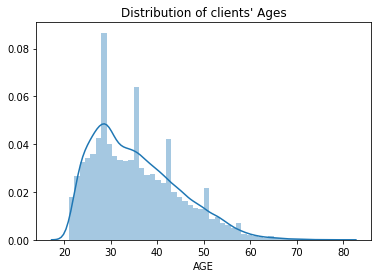

In [87]:
# Distribution of age, with an overlay of a density plot
age_dist = sns.distplot(age)
age_dist.set_title("Distribution of clients' Ages")

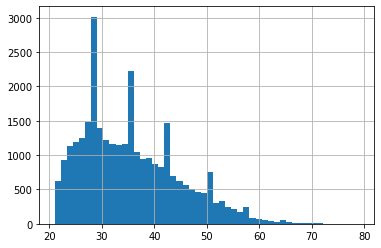

In [88]:
# Another way to plot a histogram of ages is shown below
credit_df['AGE'].hist(bins=50)

In [91]:
credit_df['AGE'].dtype, credit_df['EDUCATION'].dtype, len(credit_df.MARRIAGE.dropna())

(dtype('int64'), dtype('O'), 30000)

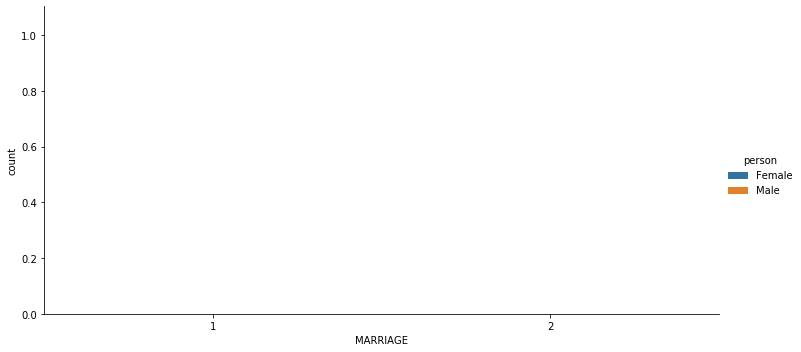

In [182]:
# Lets do a factorplot of clients splitted into sex, children and class
sns.factorplot('MARRIAGE', data=credit_df, kind='count', hue='person', order=[1,2], 
               hue_order=['Female','Male'], aspect=2)

In [180]:
# Count number of men, women and children
credit_df['person'].value_counts()

Female           14148
Male              9034
late payments     6818
Name: person, dtype: int64

C:\Users\i_seg\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


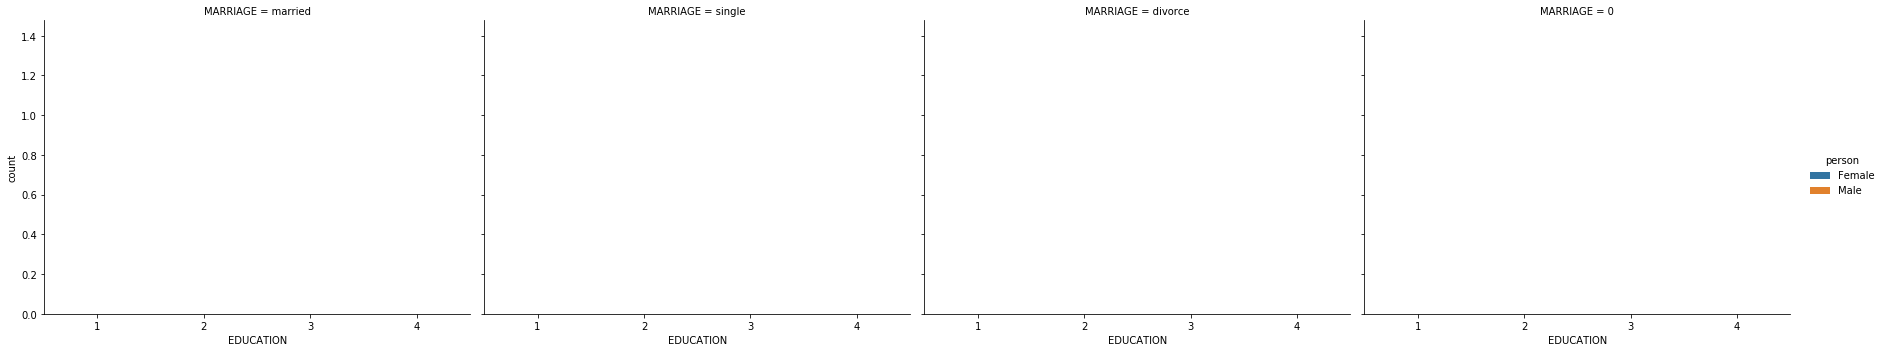

In [179]:
# Do the same as above, but split the clients 
sns.factorplot('EDUCATION', data=credit_df, kind='count', hue='person', col='MARRIAGE', order=[1,2,3,4], 
               hue_order=['Female','Male'], aspect=1.25, size=5)

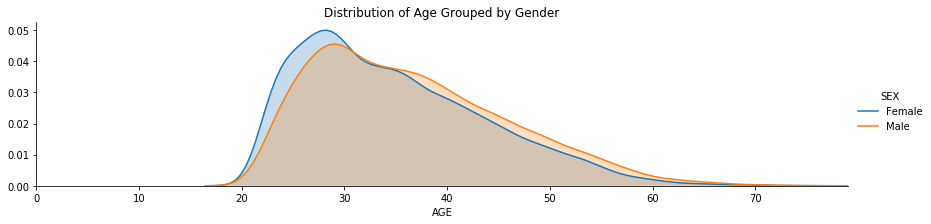

In [105]:
#Grouped by Gender

fig = sns.FacetGrid(credit_df, hue='SEX', aspect=4)
fig.map(sns.kdeplot, 'AGE', shade=True)
oldest = credit_df['AGE'].max()
fig.set(xlim=(0,oldest))
fig.set(title='Distribution of Age Grouped by Gender')
fig.add_legend()

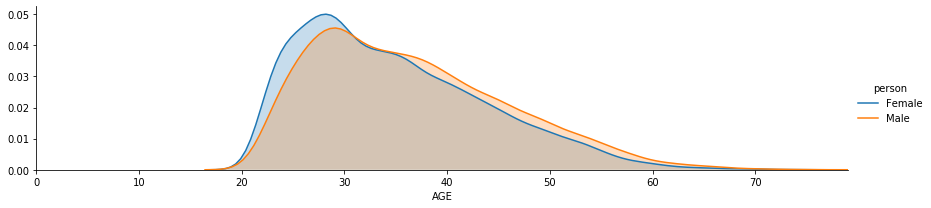

In [109]:
fig = sns.FacetGrid(credit_df, hue='person', aspect=4)
fig.map(sns.kdeplot, 'AGE', shade=True)
oldest = credit_df['AGE'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

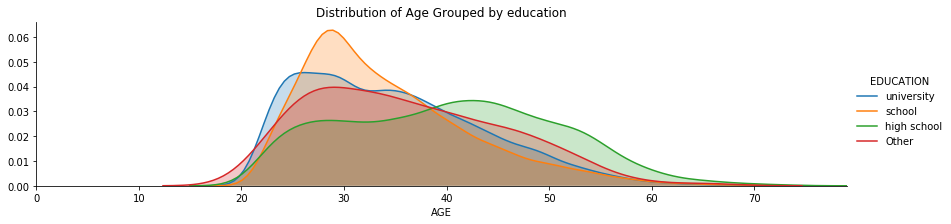

In [114]:
#Grouped by Class
fig = sns.FacetGrid(credit_df, hue='EDUCATION', aspect=4)
fig.map(sns.kdeplot, 'AGE', shade=True)
oldest = credit_df['AGE'].max()
fig.set(xlim=(0,oldest))
fig.set(title='Distribution of Age Grouped by education')
fig.add_legend()

In [118]:
deck = credit_df['EDUCATION'].dropna()
deck.head()


0    university
1    university
2    university
3    university
4    university
Name: EDUCATION, dtype: object

In [117]:
d = []
for c in deck:
    d.append(c[0])

In [119]:
d[0:10]

['u', 'u', 'u', 'u', 'u', 's', 's', 'u', 'h', 'h']

In [120]:
from collections import Counter
Counter(d)

Counter({'u': 14030, 's': 10585, 'h': 4917, 'O': 468})

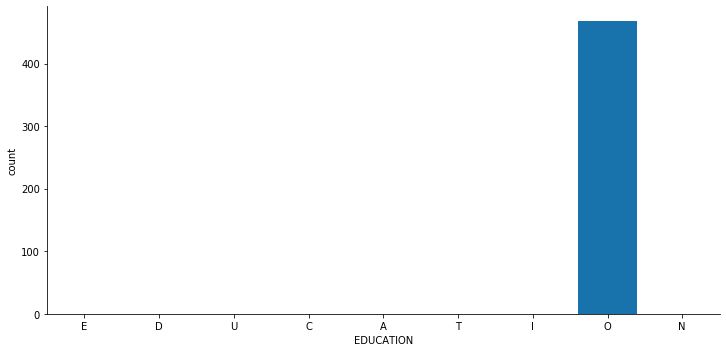

In [123]:
cabin_df = DataFrame(d)
cabin_df.columns=['EDUCATION']
sns.factorplot('EDUCATION', data=cabin_df, kind='count', order=['E','D','U','C','A','T','I','O','N'], aspect=2, 
              palette='winter_d')

In [124]:
# Drop the 'T' 
cabin_df = cabin_df[cabin_df['EDUCATION'] != 'T']

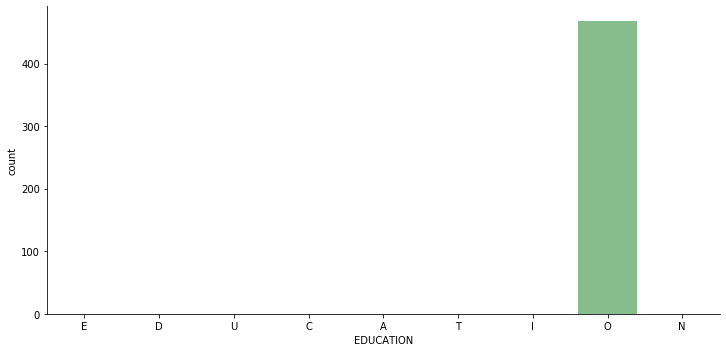

In [125]:
# Then replot the  factorplot as above
sns.factorplot('EDUCATION', data=cabin_df, kind='count', order=['E','D','U','C','A','T','I','O','N'], aspect=2, 
              palette='Greens_d')

In [126]:
# Below is a link to the list of matplotlib colormaps
url = 'http://matplotlib.org/api/pyplot_summary.html?highlight=colormaps#matplotlib.pyplot.colormaps'
import webbrowser
webbrowser.open(url)

True

In [130]:
# For tabulated values, use crosstab pandas method instead of the factorplot in seaborn
port = pd.crosstab(index=[credit_df.SEX], columns=[credit_df.EDUCATION])
port.columns = [['School','University','High School','Other']]

In [131]:
port

,School,University,High School,Other
SEX,,,,
Female,298,2927,6231,8656
Male,170,1990,4354,5374


In [132]:
port.index

Index(['Female', 'Male'], dtype='object', name='SEX')

In [133]:
port.columns

MultiIndex([(     'School',),
            ( 'University',),
            ('High School',),
            (      'Other',)],
           )

In [135]:

port.index=[['First','Second']]

In [136]:
port

,School,University,High School,Other
First,298,2927,6231,8656
Second,170,1990,4354,5374
